# Creating the dataframe and plotting the data

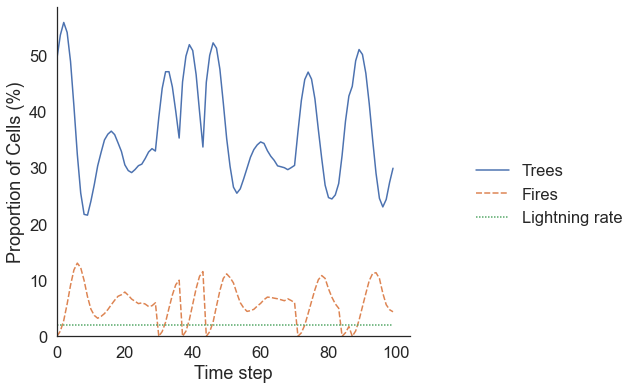

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import add_simulation_script
import importlib

# Reloading the script each time to update any changes made to probability f
importlib.reload(add_simulation_script)

# Loading the simulation
with np.load("add_forest_simulation.npz") as n:
    grid = n["state"]

# Creating empty list for trees and fires
num_trees = []
num_fires = []

# looping over each time step in state (grid)
for nstate in grid:
    # Calculating total number of cells in the grid 
    total_cells = nstate.shape[0]*nstate.shape[1]
    
    # Counting trees, then calculating percentage coverage
    trees = np.count_nonzero(nstate == 1)/(total_cells)*100
    num_trees.append(trees)
    
    # Counting fires, then calculating percentage coverage
    fires = np.count_nonzero(nstate == 2)/(total_cells)*100
    num_fires.append(fires)
    
# Lightning rate (probability f) calculated as a percentage
lightning = add_simulation_script.f*100

# Creating dataframe
add_forestfire = pd.DataFrame({"Trees" : num_trees, "Fires" : num_fires, "Lightning rate" : lightning})
add_forestfire.index.name = "Time step"

# Setting size of figure, style and font size 
sns.set(style = "white", font_scale=1.5)

# Plotting the data
plot = sns.relplot(data=add_forestfire, kind="line").set(
    xlim=(0, None), 
    ylim=(0, None), 
    ylabel="Proportion of Cells (%)"
)

# Set figure size (inches)
plot.fig.set_size_inches(10, 6)

# Saving output as a png (picture) file
plt.savefig('add_plot.png')